In [40]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.info()

<Axes: >

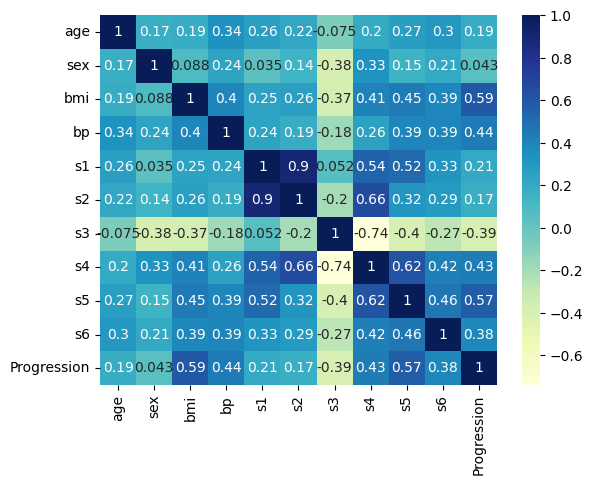

In [3]:
sns.heatmap(diabetes_df.corr(), annot=True,cmap='YlGnBu' )

Task has asked to use all data from the dataset.
Would remove Age, Sex and S2 if domain knowledge allowed me to determine that they were not relevant to model. 

In [4]:
X_feature = diabetes_df.drop('Progression', axis = 1) # Input matrix.
y_target = diabetes_df['Progression'] # Target/output vector.

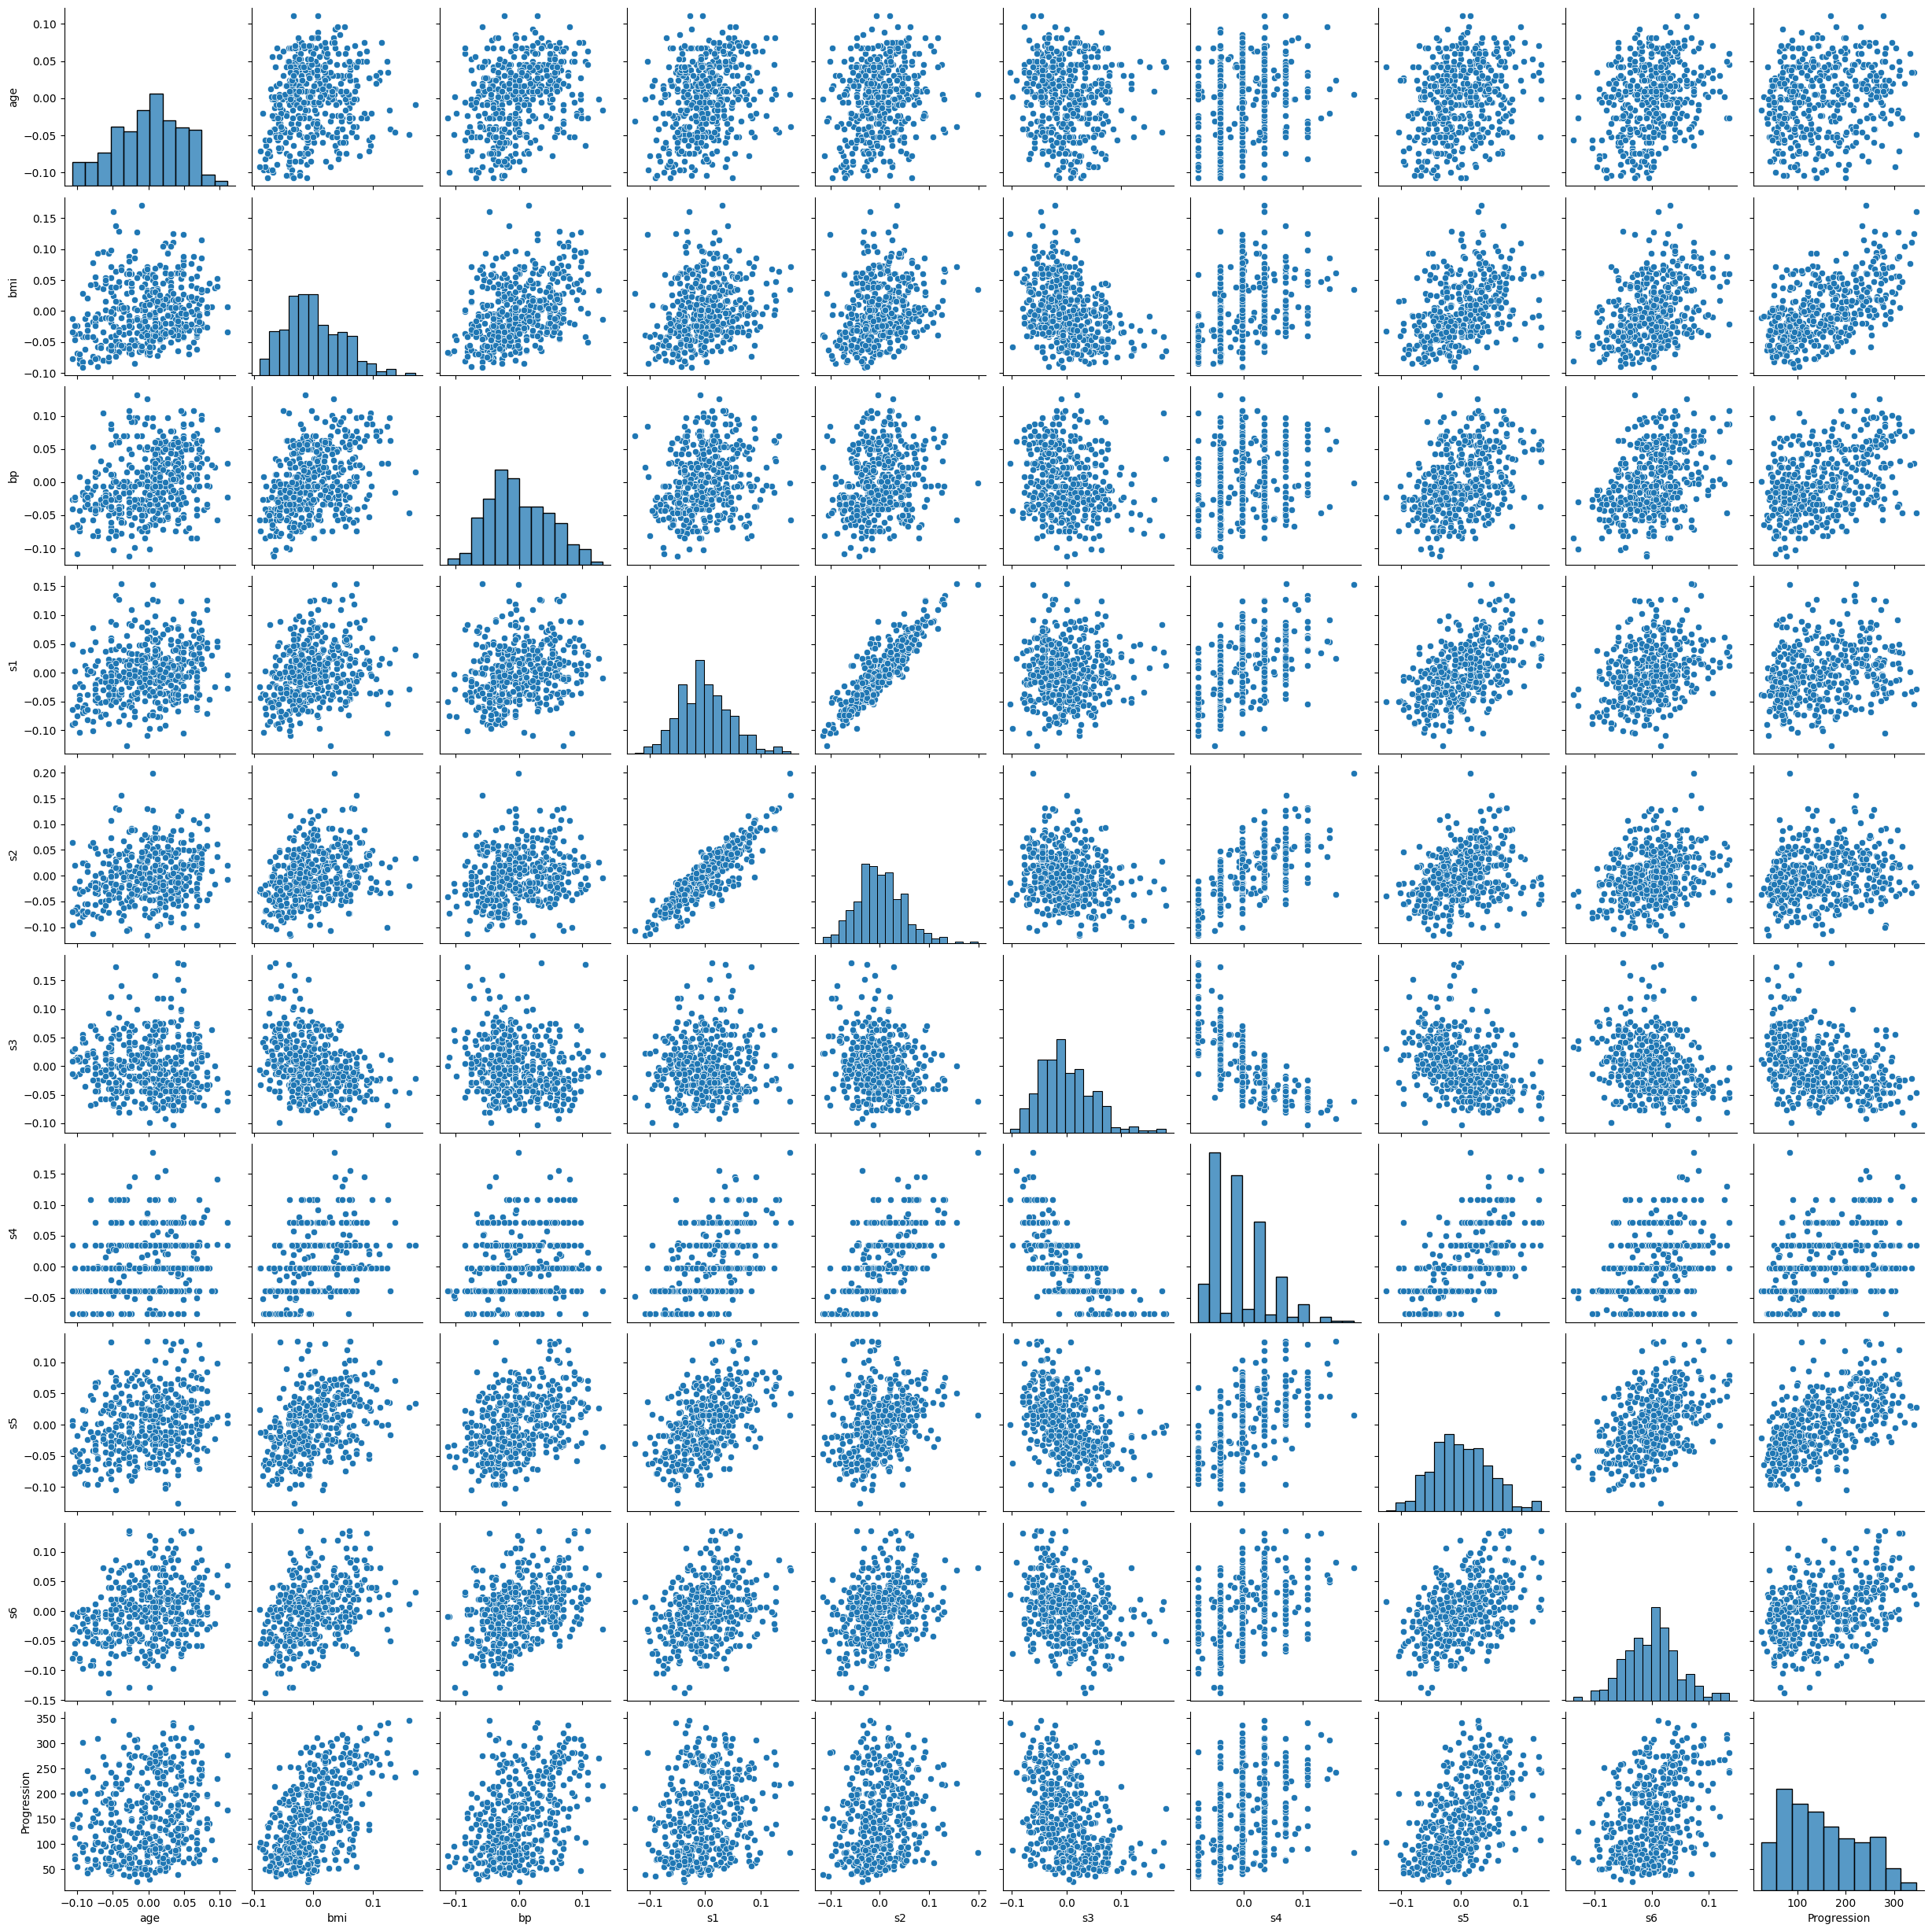

In [5]:
# Initial look at shape of data in a visual presentation.
sns.pairplot(data=diabetes_df.drop(['sex'], axis=1))


In [20]:
# Normalise the data and keep the original datSa distribution for testing
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.20, random_state=42)

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (353, 10) (353,)
Test data: (89, 10) (89,)


In [15]:
multi_reg_model = LinearRegression()
multi_reg_model.fit(X_train, y_train)

LinearRegression()

In [53]:
print('Intercept:', multi_reg_model.intercept_)
print('Coefficient:', multi_reg_model.coef_)

diabetes_df.info() 

Intercept: 151.34560453985995
Coefficient: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Positive coefficient values indicate that the increase in X variable increase target ('Progression')

In [ ]:
# Prediction  for the test set.
y_pred = multi_reg_model.predict(X_test)
y_pred

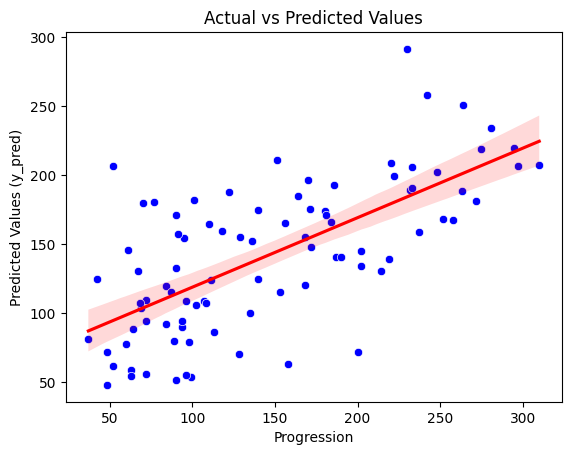

In [50]:
# Plot to show the test against prediction. 
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')

sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Regression Line')
plt.show()
# Plot shows the variance between y_pred and y_test values. 

In [55]:
# Model performance metrics. Show how well the model performs. 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100 # Provides r2 as a percentage. 
mae = mean_absolute_error(y_test, y_pred)

print('MSE:', mse)
print('R-squared', round(r2,5), '%')

MSE: 2900.193628493483
R-squared 45.26028 %


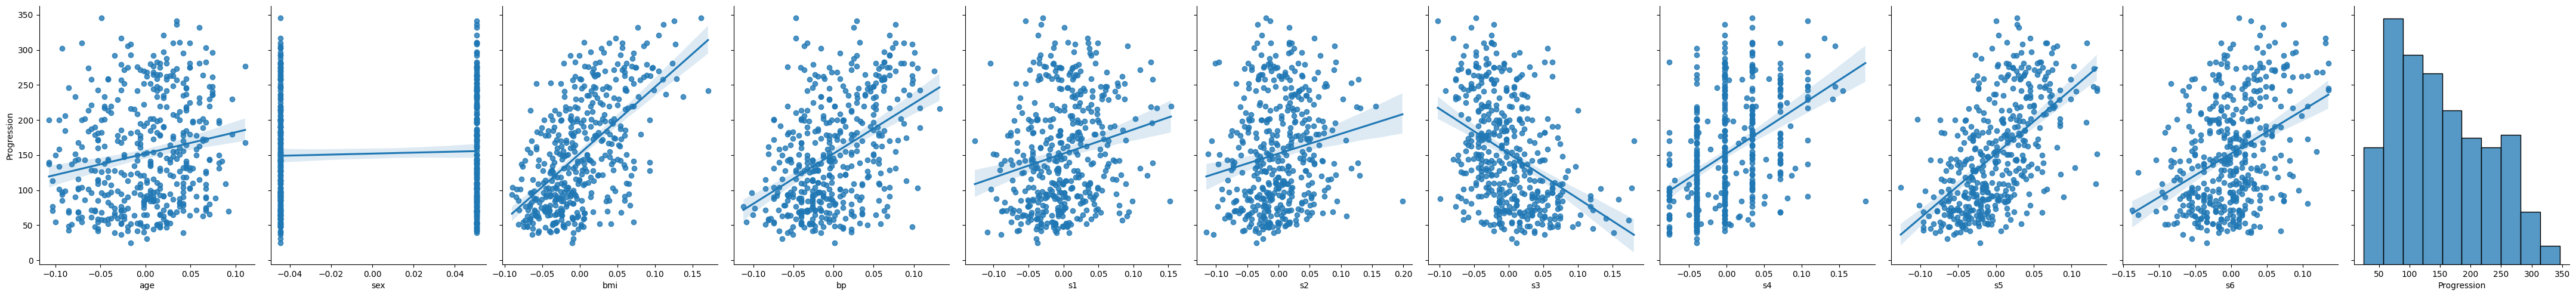

In [32]:
# Pair plot to reference for summary of metrics. 
sns.pairplot(diabetes_df, y_vars='Progression', height=5, aspect=0.8, kind='reg')


MSE is high. May indicate some of the data is displaying larger mean errors and therefore making the value higher. Lack of possitive correlation between values at the start of the analysis my contribute to this. 

R-Squared value - The value shows moderate explanation of the variance in the progression score. More than 50% of the variance cannot be explained. 